In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
customers = pd.read_csv("Customer.csv")
customers.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [3]:
transactions = pd.read_csv("transactions.csv")
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [4]:
prod_info = pd.read_csv("prod_cat_info.csv")
prod_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly

In [5]:
customer_transaction = pd.merge(left = customers, right = transactions, left_on = "customer_Id", right_on = "cust_id", how = "right", indicator = True)

In [6]:
customer_transaction.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,both
2,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store,both
3,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop,both
4,268408,02-01-1970,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store,both


In [7]:
customer_transaction_product = pd.merge(left = customer_transaction, right = prod_info, left_on = ["prod_cat_code", "prod_subcat_code"], right_on = ["prod_cat_code", "prod_sub_cat_code"], indicator = "exists")

In [8]:
customer_transaction_product.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat,exists
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction,both
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,both,Books,7,Fiction,both
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,both,Books,7,Fiction,both
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,both,Books,7,Fiction,both
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,both,Books,7,Fiction,both


In [9]:
customer_final = customer_transaction_product.iloc[:, [0,1,2,3,4,6,7,8,9,10,11,12,13,15,16,17]]

In [10]:
customer_final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction


### 2. Prepare a summary report for the merged data set. 
#### a. Get the column names and their corresponding data types

In [11]:
customer_final.dtypes

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

#### b. Top/Bottom 10 observations

In [12]:
customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
5,274630,01-02-1970,M,4.0,78357345891,11/4/2012,7,5,1,646,67.830,713.830,TeleShop,Books,7,Fiction
6,273541,01-02-1970,M,4.0,23916816961,9/2/2013,7,5,4,410,172.200,1812.200,e-Shop,Books,7,Fiction
7,269008,13-02-1970,F,6.0,35560569829,9/3/2013,7,5,1,1441,151.305,1592.305,e-Shop,Books,7,Fiction
8,269008,13-02-1970,F,6.0,94033312891,26-04-2012,7,5,5,746,391.650,4121.650,MBR,Books,7,Fiction
9,267199,14-02-1970,NaN,2.0,56749259881,11/1/2012,7,5,4,1049,440.580,4636.580,MBR,Books,7,Fiction


In [13]:
customer_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
23043,268914,15-11-1992,F,3.0,1407823655,10/6/2011,10,5,1,1252,131.460,1383.460,MBR,Books,10,Non-Fiction
23044,269519,17-11-1992,M,9.0,29719500605,24-12-2013,10,5,4,1036,435.120,4579.120,TeleShop,Books,10,Non-Fiction
23045,273524,25-11-1992,F,1.0,25762805863,19-11-2012,10,5,1,1401,147.105,1548.105,Flagship store,Books,10,Non-Fiction
23046,272141,02-12-1992,F,10.0,71337087467,22-07-2012,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,10,Non-Fiction
23047,272141,02-12-1992,F,10.0,71337087467,16-07-2012,10,5,3,1422,447.930,4713.930,e-Shop,Books,10,Non-Fiction
23048,267812,04-12-1992,F,1.0,63540378797,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction
23052,268097,15-12-1992,F,7.0,90114483354,26-01-2011,10,5,4,1408,591.360,6223.360,e-Shop,Books,10,Non-Fiction


#### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [14]:
def fn_cont_var(x):
    return pd.Series([x.min(), x.quantile(0.25), x.quantile(0.50), x.quantile(0.75), x.max()],
                    index = ["Min", "Q1", "Median","Q3", "Max"])

In [15]:
customer_final.select_dtypes(["int64", "float64"]).apply(fn_cont_var).T

,Min,Q1,Median,Q3,Max
customer_Id,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
city_code,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01
transaction_id,3268991.000,2.493864e+10,5.009313e+10,7.533000e+10,9.998755e+10
prod_subcat_code,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,1.000,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Qty,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,-1499.000,3.120000e+02,7.100000e+02,1.109000e+03,1.500000e+03
Tax,7.350,9.828000e+01,1.990800e+02,3.657150e+02,7.875000e+02
total_amt,-8270.925,7.624500e+02,1.754740e+03,3.569150e+03,8.287500e+03
prod_sub_cat_code,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01


#### d. Frequency tables for all the categorical variables

In [16]:
customer_final.select_dtypes("object").describe()

,DOB,Gender,tran_date,Store_type,prod_cat,prod_subcat
count,23053,23044,23053,23053,23053,23053
unique,3987,2,1129,4,6,18
top,27-12-1988,M,13-07-2011,e-Shop,Books,Women
freq,32,11811,35,9311,6069,3048


### 3. Generate histograms for all continuous variables and frequency bars for categorical variables

In [17]:
def distplot(x):
    plt.figure(figsize = (5,3))
    sns.distplot(x.dropna())
    plt.show()

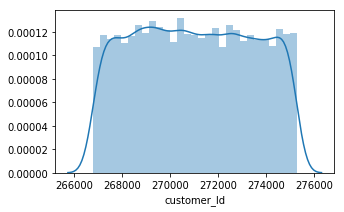

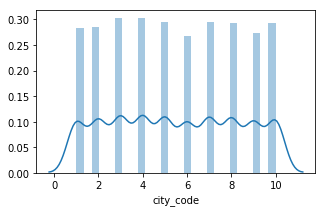

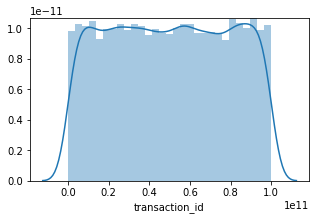

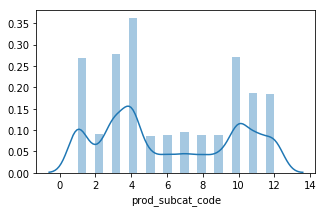

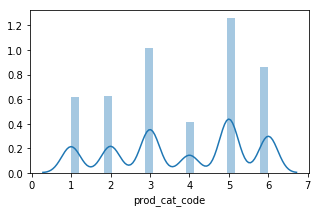

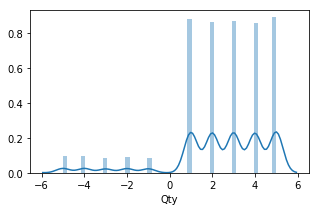

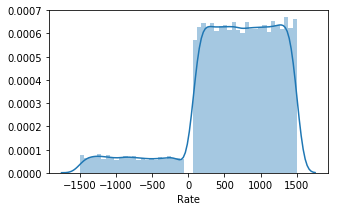

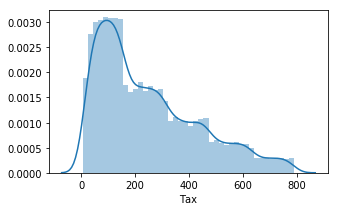

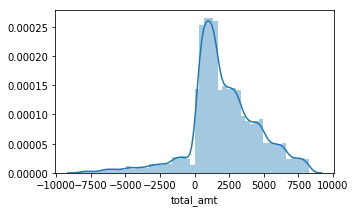

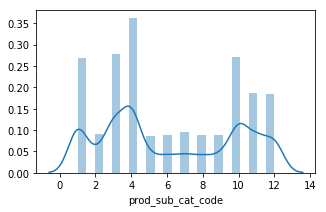

customer_Id          None
city_code            None
transaction_id       None
prod_subcat_code     None
prod_cat_code        None
Qty                  None
Rate                 None
Tax                  None
total_amt            None
prod_sub_cat_code    None
dtype: object

In [18]:
customer_final.select_dtypes(["int64", "float64"]).apply(distplot)

In [19]:
def countplot(x):
    plt.figure(figsize = (5,3))
    sns.countplot(x.dropna())
    plt.show()

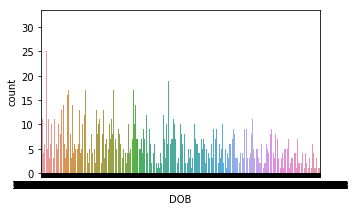

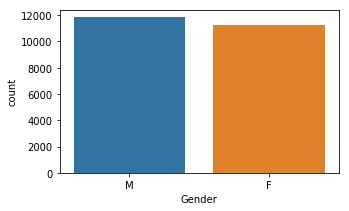

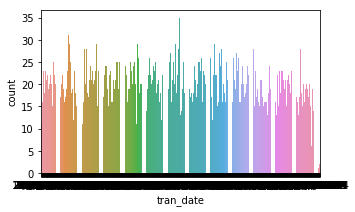

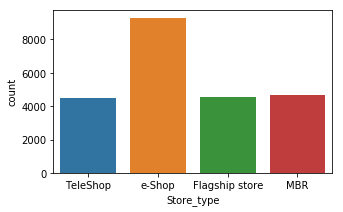

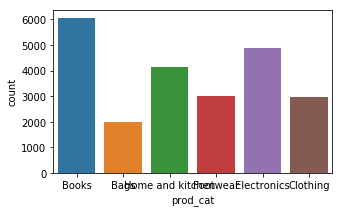

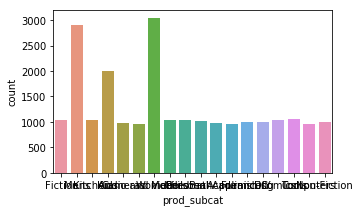

DOB            None
Gender         None
tran_date      None
Store_type     None
prod_cat       None
prod_subcat    None
dtype: object

In [20]:
customer_final.select_dtypes("object").apply(countplot)

### 4. Calculate the following information using the merged dataset :   
#### a. Time period of the available transaction data

In [21]:
customer_final["tran_date"] = customer_final["tran_date"].apply(pd.to_datetime, dayfirst = True)

C:\Users\jiyaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
(customer_final.tran_date.max() - customer_final.tran_date.min()).days

1130

#### b. Count of transactions where the total amount of transaction was negative

In [23]:
customer_final.total_amt[customer_final["total_amt"] < 0].count()

2177

### 5. Analyze which product categories are more popular among females vs male customers.

In [24]:
product_category_popular_female = customer_final.loc[customer_final.Gender == "F"].groupby("prod_cat")["prod_cat"].count()
product_category_popular_female = product_category_popular_female.loc[(product_category_popular_female == product_category_popular_female.max())]
product_category_popular_female

prod_cat
Books    2949
Name: prod_cat, dtype: int64

In [25]:
product_category_popular_male = customer_final.loc[customer_final.Gender == "M"].groupby("prod_cat")["prod_cat"].count()
product_category_popular_male = product_category_popular_male[product_category_popular_male == product_category_popular_male.max()]
product_category_popular_male

prod_cat
Books    3116
Name: prod_cat, dtype: int64

### 6. Which City code has the maximum customers and what was the percentage of customers from that city

In [26]:
city_max_customer = customer_final.groupby("city_code")["city_code"].count()
city_max_customer_max = city_max_customer.loc[city_max_customer == city_max_customer.max()]
city_max_customer_sum = city_max_customer.sum()

percentage_customer = (city_max_customer_max/city_max_customer_sum) * 100

In [27]:
percentage_customer

city_code
4.0    10.509872
Name: city_code, dtype: float64

### 7. Which store type sells the maximum products by value and by quantity?

In [28]:
store_type_max_value = customer_final.groupby("Store_type")["total_amt"].sum()
store_type_max_value = store_type_max_value.loc[store_type_max_value == store_type_max_value.max()]
store_type_max_value    #By Value

Store_type
e-Shop    19824816.05
Name: total_amt, dtype: float64

In [29]:
store_type_max_quantity = customer_final.groupby("Store_type")["Qty"].sum()
store_type_max_quantity = store_type_max_quantity.loc[store_type_max_quantity == store_type_max_quantity.max()]
store_type_max_quantity  #By Quantity

Store_type
e-Shop    22763
Name: Qty, dtype: int64

### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [30]:
total_amount = customer_final.loc[(customer_final["Store_type"] == "Flagship store") & ((customer_final["prod_cat"] == "Electronics") | (customer_final["prod_cat"] == "Clothing"))]

In [31]:
total_amount.total_amt.sum()

3409559.27

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [32]:
total_amount_male_customer = customer_final.loc[(customer_final["Gender"] == "M") & (customer_final["prod_cat"] == "Electronics")]

In [33]:
total_amount_male_customer.total_amt.sum()

5703109.425

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts

In [34]:
unique_ten_transaction = customer_final.loc[customer_final["total_amt"] > 0]

In [35]:
unique_ten_transaction = customer_final.groupby("customer_Id")["transaction_id"].nunique()

In [36]:
unique_ten_transaction = unique_ten_transaction.loc[(unique_ten_transaction > 10)].count()

In [37]:
unique_ten_transaction

6

### 11. For all customers aged between 25 - 35, find out:   
#### a. What was the total amount spent for “Electronics” and “Books” product categories

In [38]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [39]:
customer_final_age=customer_final.copy()

date_formats = ['%d/%m/%Y', '%d-%m-%Y']

converted_DOBs=[]
now = pd.Timestamp(datetime.now())
for date in customer_final_age.DOB:
    for date_format in date_formats:
        try:
            converted_date=pd.to_datetime(date,format=date_format)
            age = relativedelta(now, converted_date).years
            converted_DOBs.append(age)
        except ValueError:
            pass
        
customer_final_age["age"]=pd.Series(pd.to_numeric(converted_DOBs))

customer_final_age=customer_final_age.loc[(((customer_final_age["age"]>=25) & (customer_final_age["age"]<=35)) & ((customer_final_age["prod_cat"]=="Electronics") | (customer_final_age["prod_cat"]=="Books"))) ,]

In [40]:
customer_final_age.total_amt.sum()

9315653.879999999

#### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [41]:
total_spent_btw_dates=customer_final_age.copy()

date_formats = ['%d/%m/%Y', '%d-%m-%Y']

converted_transaction_dates=[]

for date in total_spent_btw_dates.tran_date:
    for date_format in date_formats:
        try:
            converted_date=pd.to_datetime(date,format=date_format)
            converted_transaction_dates.append(converted_date)
        except ValueError:
            pass
        

In [42]:
total_spent_btw_dates["converted_transaction_dates"] = pd.Series(converted_transaction_dates)

In [43]:
start_date=pd.to_datetime("01 Jan,2014",format="%d %b,%Y")
end_date=pd.to_datetime("01 Mar,2014",format="%d %b,%Y")
total_spent_btw_dates=total_spent_btw_dates.loc[((total_spent_btw_dates.converted_transaction_dates>=start_date) & (total_spent_btw_dates.converted_transaction_dates<=end_date)),]
total_spent_btw_dates.total_amt.sum()

154166.28500000003